# ML models:
    1) Classifcation
    2) Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Read the data from the provided .csv data, check the delimiter first

In [5]:
InputData = pd.read_csv('data_exercise_6_1_edp.csv', delimiter=';')
InputData.head() # Show the first few rows of the data

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
0,T01,2017-01-13 03:40:00+00:00,1262.1,205.9,852.9,474.8,35.0,54,55,55,...,0.0,-498.3,110.8,53.1,498.3,0.0,110.8,33,342.6,1
1,T07,2017-01-13 03:50:00+00:00,1359.1,236.2,769.7,465.0,38.0,60,60,59,...,0.0,-604.1,75.6,21.4,604.1,0.0,75.6,39,333.6,1
2,T07,2017-01-13 04:40:00+00:00,233.1,158.5,203.5,22.7,35.0,46,47,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,326.7,2
3,T07,2017-01-13 05:00:00+00:00,1250.7,113.7,351.2,388.3,33.0,42,42,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,310.1,2
4,T01,2017-01-13 05:00:00+00:00,206.4,143.0,158.0,14.5,30.0,36,36,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,311.0,2


#### Check and correct the timestamp format

In [6]:
InputData.Timestamp.values

array(['2017-01-13 03:40:00+00:00', '2017-01-13 03:50:00+00:00',
       '2017-01-13 04:40:00+00:00', ..., '2017-10-26 11:20:00+00:00',
       '2017-10-26 11:30:00+00:00', '2017-10-26 11:40:00+00:00'],
      dtype=object)

The timestamp data type looks correct but it is stored as strings rather than date variables - let us convert it to a datetime format, which is very useful as it allows directly to index data temporally:

In [7]:
InputData.Timestamp = pd.to_datetime(InputData.Timestamp)

In [8]:
InputData.Timestamp.values

array(['2017-01-13T03:40:00.000000000', '2017-01-13T03:50:00.000000000',
       '2017-01-13T04:40:00.000000000', ...,
       '2017-10-26T11:20:00.000000000', '2017-10-26T11:30:00.000000000',
       '2017-10-26T11:40:00.000000000'], dtype='datetime64[ns]')

In [7]:
InputData.head()

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
0,T01,2017-01-13 03:40:00+00:00,1262.1,205.9,852.9,474.8,35.0,54,55,55,...,0.0,-498.3,110.8,53.1,498.3,0.0,110.8,33,342.6,1
1,T07,2017-01-13 03:50:00+00:00,1359.1,236.2,769.7,465.0,38.0,60,60,59,...,0.0,-604.1,75.6,21.4,604.1,0.0,75.6,39,333.6,1
2,T07,2017-01-13 04:40:00+00:00,233.1,158.5,203.5,22.7,35.0,46,47,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,326.7,2
3,T07,2017-01-13 05:00:00+00:00,1250.7,113.7,351.2,388.3,33.0,42,42,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,310.1,2
4,T01,2017-01-13 05:00:00+00:00,206.4,143.0,158.0,14.5,30.0,36,36,36,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,311.0,2


#### Generate a multi-index dataframe with Turbine ID and Timestamp as the indices

In [9]:
InputData.index = pd.MultiIndex.from_frame(InputData.iloc[:,0:2])
InputData.head()

Turbine_ID                 Timestamp  \
Turbine_ID Timestamp                                                        
T01        2017-01-13 03:40:00+00:00        T01 2017-01-13 03:40:00+00:00   
T07        2017-01-13 03:50:00+00:00        T07 2017-01-13 03:50:00+00:00   
           2017-01-13 04:40:00+00:00        T07 2017-01-13 04:40:00+00:00   
           2017-01-13 05:00:00+00:00        T07 2017-01-13 05:00:00+00:00   
T01        2017-01-13 05:00:00+00:00        T01 2017-01-13 05:00:00+00:00   

                                      Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Turbine_ID Timestamp                                                          
T01        2017-01-13 03:40:00+00:00       1262.1        205.9        852.9   
T07        2017-01-13 03:50:00+00:00       1359.1        236.2        769.7   
           2017-01-13 04:40:00+00:00        233.1        158.5        203.5   
           2017-01-13 05:00:00+00:00       1250.7        113.7        351.2   
T01        2017-01-13 05:00:00+00:00        206.4        143.0        158.0   

                                      Gen_RPM_Std  Gen_Bear_Temp_Avg  \
Turbine_ID Timestamp                                                   
T01        2017-01-13 03:40:00+00:00        474.8               35.0   
T07        2017-01-13 03:50:00+00:00        465.0               38.0   
           2017-01-13 04:40:00+00:00         22.7               35.0   
           2017-01-13 05:00:00+00:00        388.3               33.0   
T01        2017-01-13 05:00:00+00:00         14.5               30.0   

                                      Gen_Phase1_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2017-01-13 03:40:00+00:00                   54   
T07        2017-01-13 03:50:00+00:00                   60   
           2017-01-13 04:40:00+00:00                   46   
           2017-01-13 05:00:00+00:00                   42   
T01        2017-01-13 05:00:00+00:00                   36   

                                      Gen_Phase2_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2017-01-13 03:40:00+00:00                   55   
T07        2017-01-13 03:50:00+00:00                   60   
           2017-01-13 04:40:00+00:00                   47   
           2017-01-13 05:00:00+00:00                   42   
T01        2017-01-13 05:00:00+00:00                   36   

                                      Gen_Phase3_Temp_Avg  ...  \
Turbine_ID Timestamp                                       ...   
T01        2017-01-13 03:40:00+00:00                   55  ...   
T07        2017-01-13 03:50:00+00:00                   59  ...   
           2017-01-13 04:40:00+00:00                   47  ...   
           2017-01-13 05:00:00+00:00                   42  ...   
T01        2017-01-13 05:00:00+00:00                   36  ...   

                                      Grd_Prod_PsbleInd_Max  \
Turbine_ID Timestamp                                          
T01        2017-01-13 03:40:00+00:00                    0.0   
T07        2017-01-13 03:50:00+00:00                    0.0   
           2017-01-13 04:40:00+00:00                    0.0   
           2017-01-13 05:00:00+00:00                    0.0   
T01        2017-01-13 05:00:00+00:00                    0.0   

                                      Grd_Prod_PsbleInd_Min  \
Turbine_ID Timestamp                                          
T01        2017-01-13 03:40:00+00:00                 -498.3   
T07        2017-01-13 03:50:00+00:00                 -604.1   
           2017-01-13 04:40:00+00:00                    0.0   
           2017-01-13 05:00:00+00:00                    0.0   
T01        2017-01-13 05:00:00+00:00                    0.0   

                                      Grd_Prod_PsbleInd_Std  \
Turbine_ID Timestamp                                          
T01        2017-01-13 03:40:00+00:00                  110.8   
T07        2017-01-13 03:50:00+00:00          

In [10]:
df_T01= InputData.xs('T01',level='Turbine_ID')

Turbine_ID                 Timestamp  \
Turbine_ID Timestamp                                                        
T01        2017-01-13 03:40:00+00:00        T01 2017-01-13 03:40:00+00:00   
T07        2017-01-13 03:50:00+00:00        T07 2017-01-13 03:50:00+00:00   
           2017-01-13 04:40:00+00:00        T07 2017-01-13 04:40:00+00:00   
           2017-01-13 05:00:00+00:00        T07 2017-01-13 05:00:00+00:00   
T01        2017-01-13 05:00:00+00:00        T01 2017-01-13 05:00:00+00:00   

                                      Gen_RPM_Max  Gen_RPM_Min  Gen_RPM_Avg  \
Turbine_ID Timestamp                                                          
T01        2017-01-13 03:40:00+00:00       1262.1        205.9        852.9   
T07        2017-01-13 03:50:00+00:00       1359.1        236.2        769.7   
           2017-01-13 04:40:00+00:00        233.1        158.5        203.5   
           2017-01-13 05:00:00+00:00       1250.7        113.7        351.2   
T01        2017-01-13 05:00:00+00:00        206.4        143.0        158.0   

                                      Gen_RPM_Std  Gen_Bear_Temp_Avg  \
Turbine_ID Timestamp                                                   
T01        2017-01-13 03:40:00+00:00        474.8               35.0   
T07        2017-01-13 03:50:00+00:00        465.0               38.0   
           2017-01-13 04:40:00+00:00         22.7               35.0   
           2017-01-13 05:00:00+00:00        388.3               33.0   
T01        2017-01-13 05:00:00+00:00         14.5               30.0   

                                      Gen_Phase1_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2017-01-13 03:40:00+00:00                   54   
T07        2017-01-13 03:50:00+00:00                   60   
           2017-01-13 04:40:00+00:00                   46   
           2017-01-13 05:00:00+00:00                   42   
T01        2017-01-13 05:00:00+00:00                   36   

                                      Gen_Phase2_Temp_Avg  \
Turbine_ID Timestamp                                        
T01        2017-01-13 03:40:00+00:00                   55   
T07        2017-01-13 03:50:00+00:00                   60   
           2017-01-13 04:40:00+00:00                   47   
           2017-01-13 05:00:00+00:00                   42   
T01        2017-01-13 05:00:00+00:00                   36   

                                      Gen_Phase3_Temp_Avg  ...  \
Turbine_ID Timestamp                                       ...   
T01        2017-01-13 03:40:00+00:00                   55  ...   
T07        2017-01-13 03:50:00+00:00                   59  ...   
           2017-01-13 04:40:00+00:00                   47  ...   
           2017-01-13 05:00:00+00:00                   42  ...   
T01        2017-01-13 05:00:00+00:00                   36  ...   

                                      Grd_Prod_PsbleInd_Max  \
Turbine_ID Timestamp                                          
T01        2017-01-13 03:40:00+00:00                    0.0   
T07        2017-01-13 03:50:00+00:00                    0.0   
           2017-01-13 04:40:00+00:00                    0.0   
           2017-01-13 05:00:00+00:00                    0.0   
T01        2017-01-13 05:00:00+00:00                    0.0   

                                      Grd_Prod_PsbleInd_Min  \
Turbine_ID Timestamp                                          
T01        2017-01-13 03:40:00+00:00                 -498.3   
T07        2017-01-13 03:50:00+00:00                 -604.1   
           2017-01-13 04:40:00+00:00                    0.0   
           2017-01-13 05:00:00+00:00                    0.0   
T01        2017-01-13 05:00:00+00:00                    0.0   

                                      Grd_Prod_PsbleInd_Std  \
Turbine_ID Timestamp                                          
T01        2017-01-13 03:40:00+00:00                  110.8   
T07        2017-01-13 03:50:00+00:00          

#### Group the data by turbine - visualize the number of valid observation and the mean values of the provided channels

In [11]:
InputData.groupby(level='Turbine_ID').mean() # count

,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
Turbine_ID,,,,,,,,,,,,,,,,,,,,,
T01,1193.682237,940.016986,1070.154263,67.815833,45.563367,67.804016,66.484553,65.748794,34.646639,47.707852,...,-382.136887,-682.863224,74.106094,517.026127,669.799072,333.127238,81.173541,45.165761,174.424137,0.681016
T06,1197.675352,954.413308,1078.225555,65.204451,46.982959,62.077637,62.589004,62.816586,35.784625,47.918809,...,-392.785420,-684.045791,71.816410,512.319952,667.093587,342.332568,78.149217,43.934818,166.518425,0.661770
T07,1199.207850,949.541058,1077.232178,67.105765,44.657526,68.041879,67.701687,66.548572,37.652369,48.123188,...,-384.721892,-683.048497,72.669037,507.491953,665.496091,334.382728,78.837618,44.510441,166.169991,0.671186
T11,1266.814456,987.445114,1135.851165,74.556086,50.134152,63.462236,64.017688,63.724920,34.554879,49.562061,...,-408.621843,-738.640678,81.863986,564.123117,732.392499,360.042778,91.202281,44.116977,169.931368,0.592757


In [12]:
TurbineIDs = InputData.Turbine_ID.unique()
ChannelNames = InputData.columns.values
print(TurbineIDs)
print(ChannelNames)

['T01' 'T07' 'T11' 'T06']
['Turbine_ID' 'Timestamp' 'Gen_RPM_Max' 'Gen_RPM_Min' 'Gen_RPM_Avg'
 'Gen_RPM_Std' 'Gen_Bear_Temp_Avg' 'Gen_Phase1_Temp_Avg'
 'Gen_Phase2_Temp_Avg' 'Gen_Phase3_Temp_Avg' 'Hyd_Oil_Temp_Avg'
 'Gear_Oil_Temp_Avg' 'Gear_Bear_Temp_Avg' 'Nac_Temp_Avg' 'Rtr_RPM_Max'
 'Rtr_RPM_Min' 'Rtr_RPM_Avg' 'Amb_WindSpeed_Max' 'Amb_WindSpeed_Min'
 'Amb_WindSpeed_Avg' 'Amb_WindSpeed_Std' 'Amb_WindDir_Relative_Avg'
 'Amb_WindDir_Abs_Avg' 'Amb_Temp_Avg' 'Prod_LatestAvg_ActPwrGen0'
 'Prod_LatestAvg_ActPwrGen1' 'Prod_LatestAvg_ActPwrGen2'
 'Prod_LatestAvg_TotActPwr' 'Prod_LatestAvg_ReactPwrGen0'
 'Prod_LatestAvg_ReactPwrGen1' 'Prod_LatestAvg_ReactPwrGen2'
 'Prod_LatestAvg_TotReactPwr' 'HVTrafo_Phase1_Temp_Avg'
 'HVTrafo_Phase2_Temp_Avg' 'HVTrafo_Phase3_Temp_Avg'
 'Grd_InverterPhase1_Temp_Avg' 'Cont_Top_Temp_Avg' 'Cont_Hub_Temp_Avg'
 'Cont_VCP_Temp_Avg' 'Gen_SlipRing_Temp_Avg' 'Spin_Temp_Avg'
 'Blds_PitchAngle_Min' 'Blds_PitchAngle_Max' 'Blds_PitchAngle_Avg'
 'Blds_PitchAngle_Std' 'Con

<AxesSubplot:xlabel='Timestamp'>

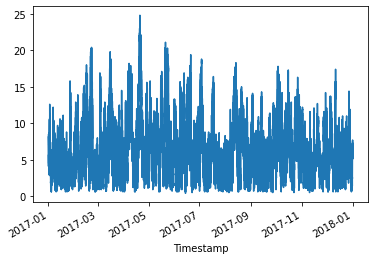

In [21]:
# 1. Time series via pandas plot
InputData.xs('T01',level='Turbine_ID').Amb_WindSpeed_Avg.plot()

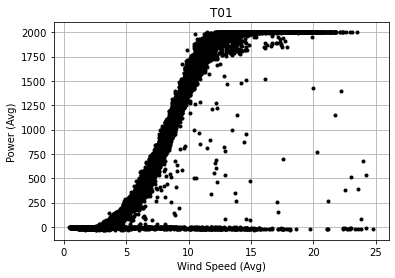

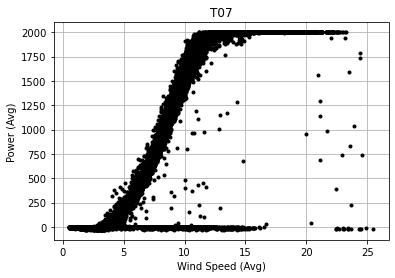

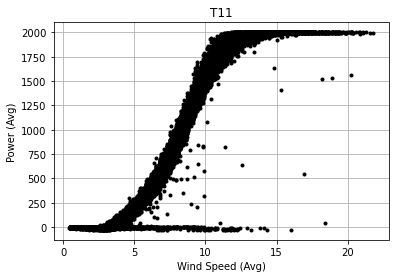

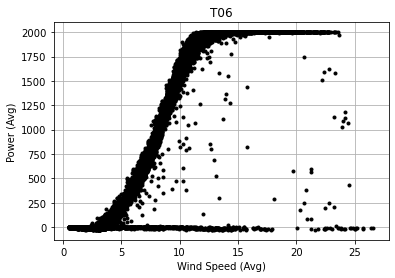

In [24]:
# 2. Scatter plot
for turb in InputData.Turbine_ID.unique():
    WS = InputData.xs(turb, level='Turbine_ID').Amb_WindSpeed_Avg
    Pow = InputData.xs(turb, level='Turbine_ID').Grd_Prod_Pwr_Avg
    plt.plot(WS, Pow, '.k')
    plt.xlabel('Wind Speed (Avg)')
    plt.ylabel('Power (Avg)')
    plt.grid()
    plt.title(turb)
    plt.show()

#### Sort the timestamps if needed

In [13]:
InputData.sort_index(axis=0,level = 1,ascending = True, inplace = True)
InputData.head()

,,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Status_Flag
Turbine_ID,Timestamp,,,,,,,,,,,,,,,,,,,,,
T01,2017-01-01 00:00:00+00:00,T01,2017-01-01 00:00:00+00:00,1460.9,1239.2,1313.7,47.9,36.0,57,57,57,...,-621.9,-1000.0,67.1,978.4,1000.0,621.9,67.1,45,108.1,0
T06,2017-01-01 00:00:00+00:00,T06,2017-01-01 00:00:00+00:00,1464.0,1236.3,1318.6,52.4,39.0,54,56,56,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,34,91.7,0
T07,2017-01-01 00:00:00+00:00,T07,2017-01-01 00:00:00+00:00,1513.4,1255.3,1336.5,47.6,36.0,58,58,58,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,37,90.8,0
T11,2017-01-01 00:00:00+00:00,T11,2017-01-01 00:00:00+00:00,1679.5,1377.7,1596.9,68.6,41.0,62,62,62,...,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,38,102.4,0
T01,2017-01-01 00:10:00+00:00,T01,2017-01-01 00:10:00+00:00,1410.6,1229.4,1271.3,27.6,36.0,57,57,57,...,-477.2,-1000.0,120.9,900.7,1000.0,477.2,120.9,44,108.1,0


## Manual Filtering

1. Setting up masks (conditions)
2. Visualize the data active in each mask in the same power curve plot 

In [14]:
T01mask = InputData.Turbine_ID == 'T01'

MaxPowerMask = InputData.Grd_Prod_Pwr_Max >= 1
MinPowerMask = InputData.Grd_Prod_Pwr_Min <= 1
MinRPMMask = InputData.Gen_RPM_Min >= 1150
MaxRPMMask = InputData.Gen_RPM_Max >= 1250

OperationalMask = MaxRPMMask & ~MinPowerMask 
TransientMask = MaxPowerMask & MaxRPMMask & ~OperationalMask
IdlingMask = ~OperationalMask & ~TransientMask

In [15]:
OperationalMask.shape

(209236,)

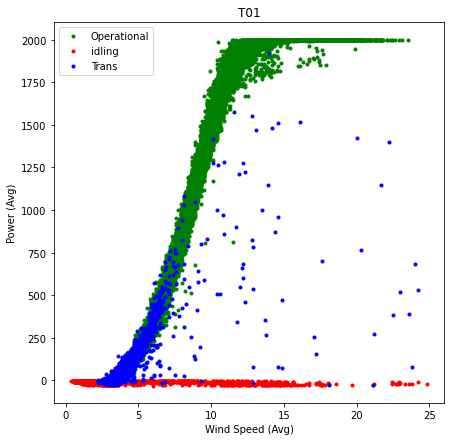

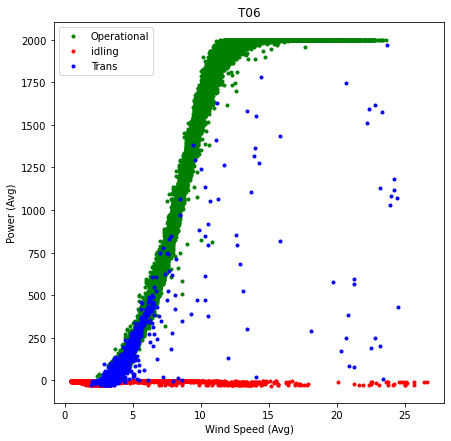

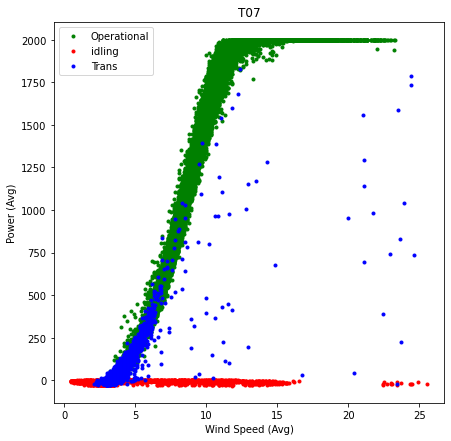

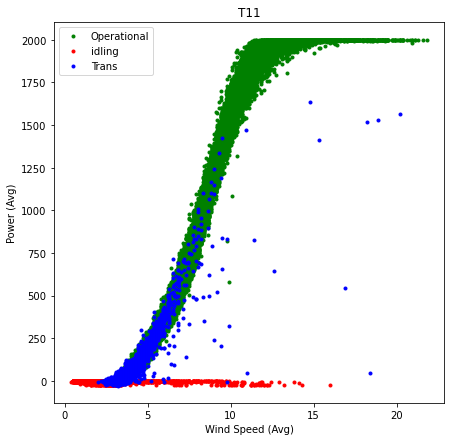

In [16]:
# Visualize the data active in each mask in the same power curve plot 
for turb in InputData.Turbine_ID.unique():
    ax, fig = plt.subplots(figsize=(7,7))
    WS_operational = InputData[OperationalMask].xs(turb, level='Turbine_ID').Amb_WindSpeed_Avg
    Pow_operational = InputData[OperationalMask].xs(turb, level='Turbine_ID').Grd_Prod_Pwr_Avg
    WS_idling = InputData[IdlingMask].xs(turb, level='Turbine_ID').Amb_WindSpeed_Avg
    Pow_idling = InputData[IdlingMask].xs(turb, level='Turbine_ID').Grd_Prod_Pwr_Avg
    WS_trans = InputData[TransientMask].xs(turb, level='Turbine_ID').Amb_WindSpeed_Avg
    Pow_trans = InputData[TransientMask].xs(turb, level='Turbine_ID').Grd_Prod_Pwr_Avg    
    plt.plot(WS_operational, Pow_operational, '.g', label='Operational')
    plt.plot(WS_idling, Pow_idling, '.r', label='idling')
    plt.plot(WS_trans, Pow_trans,'.b', label='Trans')
    plt.xlabel('Wind Speed (Avg)')
    plt.ylabel('Power (Avg)')
    plt.legend()
    plt.title(turb)
    plt.show()

In [17]:
# 3 different classes of SCADA states: Operational,Transient,Idling
TurbineOK = InputData.Status_Flag==0
TurbineTransient = InputData.Status_Flag == 1
TurbineIdling = InputData.Status_Flag == 2

In [4]:
# Plot the power curve for different status flags


### 2.2 Feature list

In [18]:
ChannelList = ['Amb_WindSpeed','Grd_Prod_Pwr','Gen_RPM','Blds_PitchAngle']
StatsList = ['Avg','Std','Min','Max']
Nfeatures = len(ChannelList)*len(StatsList)
nsamples = InputData.index.shape[0]
FeatureList = pd.DataFrame()

for ch in ChannelList:
    for st in StatsList:
        FeatureListName = ch + '_' + st
        FeatureList[FeatureListName] = InputData[FeatureListName]        
        
FeatureList

,,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindSpeed_Min,Amb_WindSpeed_Max,Grd_Prod_Pwr_Avg,Grd_Prod_Pwr_Std,Grd_Prod_Pwr_Min,Grd_Prod_Pwr_Max,Gen_RPM_Avg,Gen_RPM_Std,Gen_RPM_Min,Gen_RPM_Max,Blds_PitchAngle_Avg,Blds_PitchAngle_Std,Blds_PitchAngle_Min,Blds_PitchAngle_Max
Turbine_ID,Timestamp,,,,,,,,,,,,,,,,
T01,2017-01-01 00:00:00+00:00,5.6,1.1,1.5,10.0,291.5,62.9,129.6,428.7,1313.7,47.9,1239.2,1460.9,-1.5,0.4,-2.2,-0.2
T06,2017-01-01 00:00:00+00:00,5.8,0.9,2.5,9.7,378.1,71.9,239.1,592.8,1318.6,52.4,1236.3,1464.0,-1.7,0.4,-2.3,0.6
T07,2017-01-01 00:00:00+00:00,6.0,0.9,1.7,12.2,384.7,59.4,242.5,618.4,1336.5,47.6,1255.3,1513.4,-1.8,0.3,-2.2,-1.1
T11,2017-01-01 00:00:00+00:00,7.9,1.2,2.4,14.6,859.8,185.9,412.2,1221.3,1596.9,68.6,1377.7,1679.5,-2.2,0.2,-3.3,-0.8
T01,2017-01-01 00:10:00+00:00,4.9,1.0,1.5,18.5,207.5,55.0,98.0,413.8,1271.3,27.6,1229.4,1410.6,-1.0,0.4,-2.3,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T11,2017-12-31 23:40:00+00:00,5.4,0.9,1.6,17.6,288.2,63.4,125.4,415.4,1268.9,37.3,1221.0,1421.2,-1.5,0.5,-2.4,-0.2
T01,2017-12-31 23:50:00+00:00,5.4,0.4,4.0,6.6,242.6,41.1,151.9,340.6,1250.7,4.7,1239.8,1273.1,-1.6,0.3,-2.1,-1.0
T06,2017-12-31 23:50:00+00:00,4.7,0.8,2.2,6.5,182.8,73.3,27.2,340.3,1249.4,6.6,1229.6,1270.8,-1.0,0.4,-1.7,0.6


In [19]:
TargetClasses = InputData.Status_Flag

### 2.3 Classification Model training

In [20]:
import sklearn
import sklearn.model_selection

### We will compare two classification models
1. Random Forests: sklearn.ensemble.RandomForestClassifier
2. Neural Network: sklearn.neural_network.MLPClassifier

### Split the dataset into train, test

In [21]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(FeatureList, TargetClasses, 
                                                                            random_state=0, shuffle = True, test_size = 0.1)

In [22]:
X_train

Amb_WindSpeed_Avg  Amb_WindSpeed_Std  \
Turbine_ID Timestamp                                                         
T01        2017-09-22 12:20:00+00:00                5.6                1.1   
T06        2017-04-23 12:30:00+00:00               10.0                1.5   
T01        2017-02-10 06:00:00+00:00                2.9                0.7   
T11        2017-12-03 01:40:00+00:00                5.6                1.0   
T07        2017-04-02 22:10:00+00:00                2.9                0.5   
...                                                 ...                ...   
T11        2017-11-05 20:20:00+00:00                3.8                0.8   
           2017-07-26 04:10:00+00:00                5.7                1.0   
T06        2017-10-31 02:50:00+00:00                5.5                0.7   
T07        2017-03-17 15:40:00+00:00               12.2                2.6   
T11        2017-12-14 18:30:00+00:00                2.9                0.7   

                                      Amb_WindSpeed_Min  Amb_WindSpeed_Max  \
Turbine_ID Timestamp                                                         
T01        2017-09-22 12:20:00+00:00                0.6               11.7   
T06        2017-04-23 12:30:00+00:00                3.1               17.3   
T01        2017-02-10 06:00:00+00:00                0.7                6.7   
T11        2017-12-03 01:40:00+00:00                1.5               10.1   
T07        2017-04-02 22:10:00+00:00                0.9                4.6   
...                                                 ...                ...   
T11        2017-11-05 20:20:00+00:00                1.1                8.1   
           2017-07-26 04:10:00+00:00                1.4               12.9   
T06        2017-10-31 02:50:00+00:00                2.9                8.5   
T07        2017-03-17 15:40:00+00:00                2.9               27.9   
T11        2017-12-14 18:30:00+00:00                0.4                6.9   

                                      Grd_Prod_Pwr_Avg  Grd_Prod_Pwr_Std  \
Turbine_ID Timestamp                                                       
T01        2017-09-22 12:20:00+00:00             297.7             109.2   
T06        2017-04-23 12:30:00+00:00            1542.7             290.9   
T01        2017-02-10 06:00:00+00:00              -8.1               2.6   
T11        2017-12-03 01:40:00+00:00             274.3              43.7   
T07        2017-04-02 22:10:00+00:00              -4.8               3.2   
...                                                ...               ...   
T11        2017-11-05 20:20:00+00:00              55.3              33.3   
           2017-07-26 04:10:00+00:00             322.1              90.1   
T06        2017-10-31 02:50:00+00:00             270.4              51.0   
T07        2017-03-17 15:40:00+00:00            1975.7              78.6   
T11        2017-12-14 18:30:00+00:00              -9.3               5.2   

                                      Grd_Prod_Pwr_Min  Grd_Prod_Pwr_Max  \
Turbine_ID Timestamp                                                       
T01        2017-09-22 12:20:00+00:00             -34.0             521.9   
T06        2017-04-23 12:30:00+00:00             903.0            2084.2   
T01        2017-02-10 06:00:00+00:00             -27.4              -7.5   
T11        2017-12-03 01:40:00+00:00             188.4             381.0   
T07        2017-04-02 22:10:00+00:00             -23.7              -4.0   
...                                                ...               ...   
T11        2017-11-05 20:20:00+00:00             -16.5             105.8   
           2017-07-26 04:10:00+00:00             124.8             519.3   
T06        2017-10-31 02:50:00+00:00             167.8             405.3   
T07        2017-03-17 15:40:00+00:00            1595.3            2100.9   
T11        2017-12-14 18:30:00+00:00             -32.8              13.6   

                              

### 1. Describe the random forest model and setup the model parameters

Change (at least) the following parameters of the RandomForestClassifier model:

1. n_estimators
2. bootstrap

In [23]:
import sklearn.ensemble

In [24]:
RandFmodel = sklearn.ensemble.RandomForestClassifier(n_estimators=2, bootstrap=True)

### Fit the model

In [25]:
RandFmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=2)

### Use the model to predict on the test inputs

In [26]:
y_pred_rf = RandFmodel.predict(X_test)

#### How good is it?

#### Compute a metric or Score

In [27]:
RandFmodel.score(X_test,y_test)

0.9996654559357675

### 2. Describe the  Neural network model and setup the model parameters

Change (at least) the following parameters of the RandomForestClassifier model:

1. hidden_layer_sizes = (12,12)
2. activation = 'relu'
3. max_iter 
4. batch_size = nsamples

In [28]:
import sklearn.neural_network

In [37]:
nsamples = 6*24*7
ANNmodel = sklearn.neural_network.MLPClassifier(hidden_layer_sizes = (12,12),
                                               activation = 'relu',
                                               max_iter=200,
                                               verbose=True,
                                               batch_size = nsamples)

In [32]:
ANNmodel.fit(X_train,y_train)

Iteration 1, loss = 0.83246170
Iteration 2, loss = 0.05606605
Iteration 3, loss = 0.03482958
Iteration 4, loss = 0.03097936
Iteration 5, loss = 0.02506118
Iteration 6, loss = 0.02739349
Iteration 7, loss = 0.02550759
Iteration 8, loss = 0.02094278
Iteration 9, loss = 0.01696779
Iteration 10, loss = 0.01382259
Iteration 11, loss = 0.01593917
Iteration 12, loss = 0.01405784
Iteration 13, loss = 0.01144505
Iteration 14, loss = 0.00980877
Iteration 15, loss = 0.00893801
Iteration 16, loss = 0.00912990
Iteration 17, loss = 0.00862116
Iteration 18, loss = 0.00772572
Iteration 19, loss = 0.00686089
Iteration 20, loss = 0.00675541
Iteration 21, loss = 0.00596737
Iteration 22, loss = 0.00547384
Iteration 23, loss = 0.00554717
Iteration 24, loss = 0.00513872
Iteration 25, loss = 0.00451397
Iteration 26, loss = 0.00463430
Iteration 27, loss = 0.00462494
Iteration 28, loss = 0.00357647
Iteration 29, loss = 0.00403389
Iteration 30, loss = 0.00392916
Iteration 31, loss = 0.00359432
Iteration 32, los

MLPClassifier(batch_size=144, hidden_layer_sizes=(12, 12), verbose=True)

In [34]:
y_pred_ann = ANNmodel.predict(X_test)

In [35]:
ANNmodel.score(X_test,y_test)

0.9997132479449437

We see that the ANN model preforms less optimally than the random forest model. Could it be due to the way we've implemented the model? 

While for the random forest model the scales of different variables have no specific meaning, for the neural networks the scaling of data may be of importance due to the specific range of the activation functions. Let us try to use scaling on the input variables so that they get zero mean and unit variance, and see if this improves the ANN model performance.

In [38]:
Xscaler = sklearn.preprocessing.StandardScaler() # Scaling object
X_train_scaled = Xscaler.fit_transform(X_train)
ANNmodel.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.47311866
Iteration 2, loss = 0.14426272
Iteration 3, loss = 0.10010864
Iteration 4, loss = 0.08042690
Iteration 5, loss = 0.07162638
Iteration 6, loss = 0.06609288
Iteration 7, loss = 0.06184284
Iteration 8, loss = 0.05796138
Iteration 9, loss = 0.05440405
Iteration 10, loss = 0.05102470
Iteration 11, loss = 0.04782750
Iteration 12, loss = 0.04495598
Iteration 13, loss = 0.04204129
Iteration 14, loss = 0.03955122
Iteration 15, loss = 0.03731303
Iteration 16, loss = 0.03528279
Iteration 17, loss = 0.03339882
Iteration 18, loss = 0.03156633
Iteration 19, loss = 0.03009842
Iteration 20, loss = 0.02873067
Iteration 21, loss = 0.02749933
Iteration 22, loss = 0.02641725
Iteration 23, loss = 0.02535542
Iteration 24, loss = 0.02441275
Iteration 25, loss = 0.02345141
Iteration 26, loss = 0.02291462
Iteration 27, loss = 0.02219490
Iteration 28, loss = 0.02147685
Iteration 29, loss = 0.02097060
Iteration 30, loss = 0.02034742
Iteration 31, loss = 0.02006323
Iteration 32, los

MLPClassifier(batch_size=1008, hidden_layer_sizes=(12, 12), verbose=True)

In [39]:
y_pred_ann = ANNmodel.predict(Xscaler.transform(X_test))
ANNmodel.score(Xscaler.transform(X_test),y_test)

0.9969891034219078

#### Did the performance improve? For neural network models, it is typically necessary to scale the input data, and if we are working with a regression model, the output data may also require scaling.

### 2.4 Model evaluation - plotting results and confusion matrix

In [40]:
# %load plot_confusion_matrix.py
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, 
                          fig=None, ax=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[sklearn.utils.multiclass.unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    if not ax:
        fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
                
    fig.tight_layout()
    return ax


#### Use the defined `plot_confusion_matrix` function to vizualize the performance of both models  

Confusion matrix, without normalization
[[12458     0     0]
 [    6  3070     0]
 [    0     1  5389]]
Confusion matrix, without normalization
[[12452     6     0]
 [   36  3024    16]
 [    1     4  5385]]


<AxesSubplot:title={'center':'Neurak Networks'}, xlabel='Predicted label', ylabel='True label'>

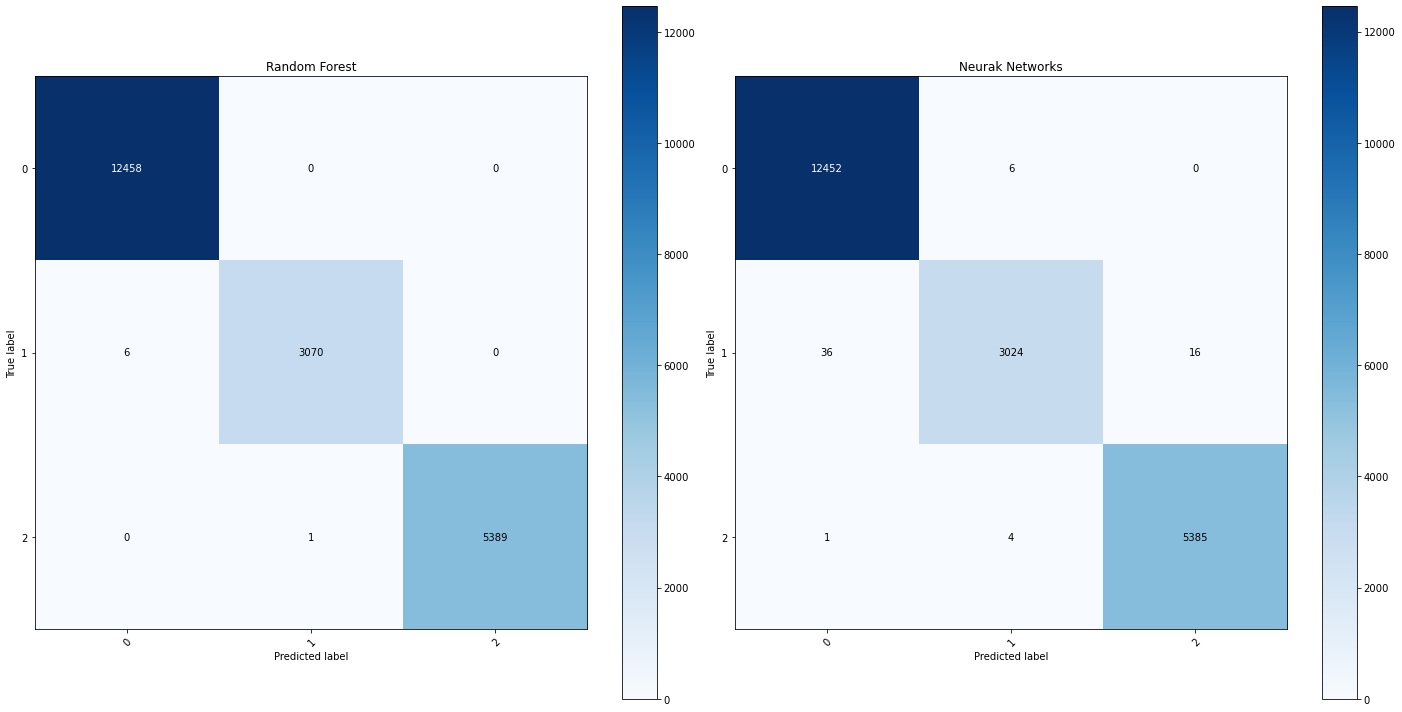

In [43]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
plot_confusion_matrix(y_test, y_pred_rf, classes=[0,1,2],
                      normalize=False,
                      title='Random Forest',
                      cmap=plt.cm.Blues, 
                      fig=fig, ax=ax[0])
plot_confusion_matrix(y_test, y_pred_ann, classes=[0,1,2],
                      normalize=False,
                      title='Neurak Networks',
                      cmap=plt.cm.Blues, 
                      fig=fig, ax=ax[1])

### Replot the power curve with the resulting classification from both models

In [ ]:
ANN_pc = ANNmodel.predict(FeatureList.xs('T01',level='Turbine_ID'))


# 2) Unsupervised learning.

### K-means clustering
Hard assignment to a cluster

In [44]:
import sklearn.cluster

In [45]:
n_clusters = 3
Kmeansmodel = sklearn.cluster.KMeans(n_clusters = n_clusters).fit(X_train)

In [46]:
y_kmeans = Kmeansmodel.predict(FeatureList)

In [48]:
y_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

####  can you name the clusters?

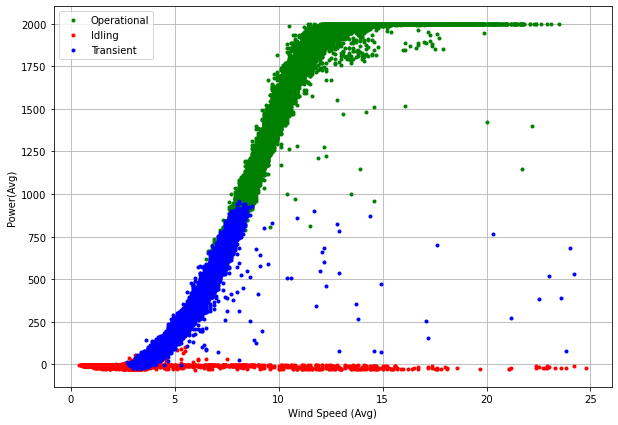

In [54]:
Kmeans_operational = y_kmeans == 2
Kmeans_trans = y_kmeans == 1
Kmeans_idle = y_kmeans == 0

WS_operational = FeatureList[Kmeans_operational].xs('T01',level='Turbine_ID').Amb_WindSpeed_Avg
Pow_operational = FeatureList[Kmeans_operational].xs('T01',level='Turbine_ID').Grd_Prod_Pwr_Avg

WS_idle = FeatureList[Kmeans_idle].xs('T01',level='Turbine_ID').Amb_WindSpeed_Avg
Pow_idle = FeatureList[Kmeans_idle].xs('T01',level='Turbine_ID').Grd_Prod_Pwr_Avg

WS_trans = FeatureList[Kmeans_trans].xs('T01',level='Turbine_ID').Amb_WindSpeed_Avg
Pow_trans = FeatureList[Kmeans_trans].xs('T01',level='Turbine_ID').Grd_Prod_Pwr_Avg

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(WS_operational,Pow_operational,'.g',label='Operational')
plt.plot(WS_idle,Pow_idle, '.r', label='Idling')
plt.plot(WS_trans,Pow_trans,'.b',label='Transient')
plt.xlabel('Wind Speed (Avg)')
plt.ylabel('Power(Avg)')
plt.grid()
plt.legend()
plt.show()

### Other clustering algorithm, Gaussian Mixture
Soft assignment to a cluster

In [55]:
import sklearn.mixture

In [56]:
n_clusters

3

In [57]:
GM_model = sklearn.mixture.GaussianMixture(n_components = n_clusters).fit(X_train)

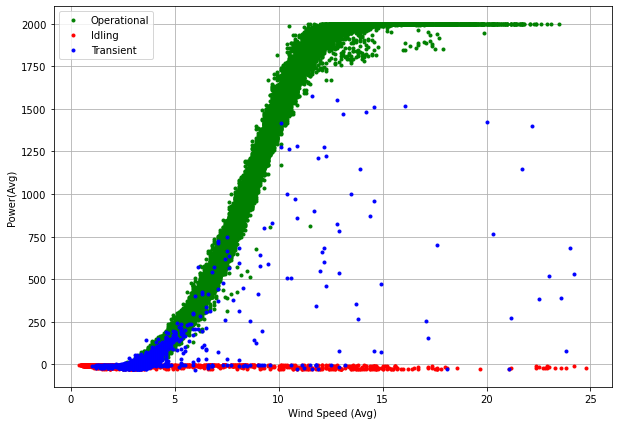

In [60]:
y_kmeans = GM_model.predict(FeatureList)
Kmeans_operational = y_kmeans == 1
Kmeans_trans = y_kmeans == 0
Kmeans_idle = y_kmeans == 2

WS_operational = FeatureList[Kmeans_operational].xs('T01',level='Turbine_ID').Amb_WindSpeed_Avg
Pow_operational = FeatureList[Kmeans_operational].xs('T01',level='Turbine_ID').Grd_Prod_Pwr_Avg

WS_idle = FeatureList[Kmeans_idle].xs('T01',level='Turbine_ID').Amb_WindSpeed_Avg
Pow_idle = FeatureList[Kmeans_idle].xs('T01',level='Turbine_ID').Grd_Prod_Pwr_Avg

WS_trans = FeatureList[Kmeans_trans].xs('T01',level='Turbine_ID').Amb_WindSpeed_Avg
Pow_trans = FeatureList[Kmeans_trans].xs('T01',level='Turbine_ID').Grd_Prod_Pwr_Avg

fig, ax = plt.subplots(figsize=(10,7))
plt.plot(WS_operational,Pow_operational,'.g',label='Operational')
plt.plot(WS_idle,Pow_idle, '.r', label='Idling')
plt.plot(WS_trans,Pow_trans,'.b',label='Transient')
plt.xlabel('Wind Speed (Avg)')
plt.ylabel('Power(Avg)')
plt.grid()
plt.legend()
plt.show()